In [7]:
# Import du jeu de donnée
import pandas as pd
import numpy as np

# copy on write

df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

<Axes: >

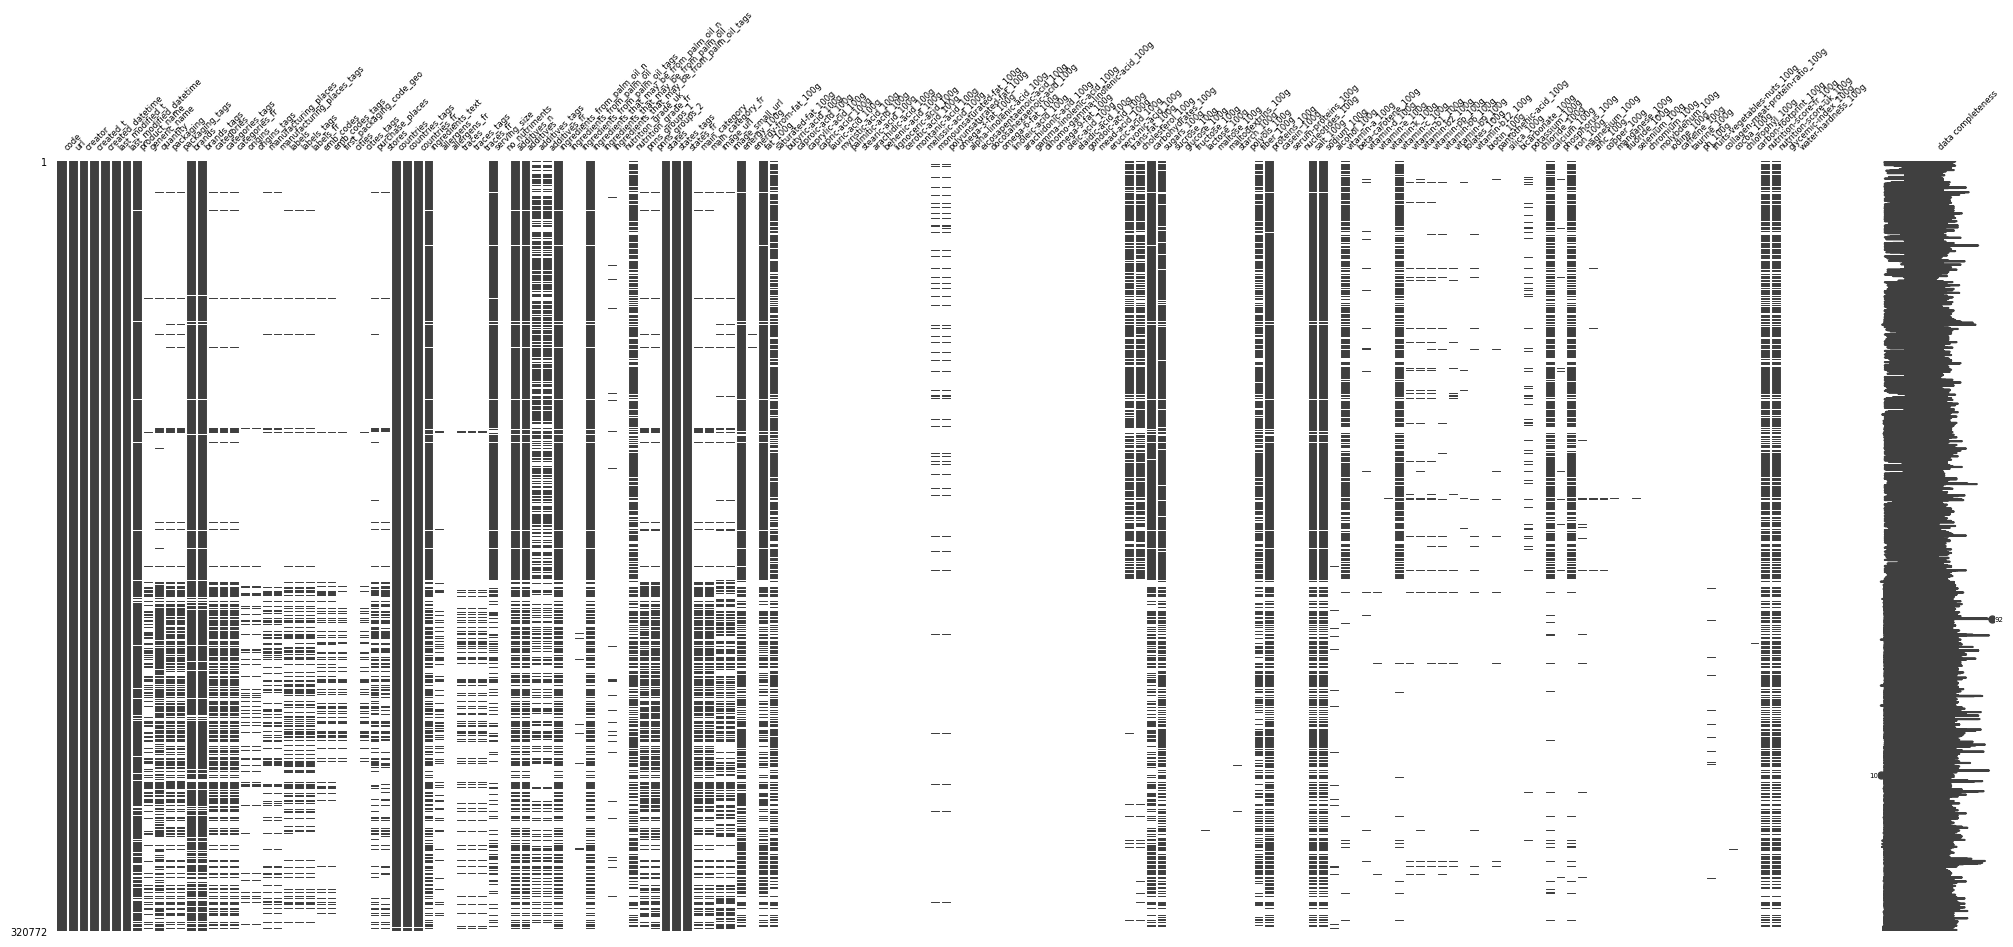

In [8]:
# missingno matrice avec label
import missingno as msno
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

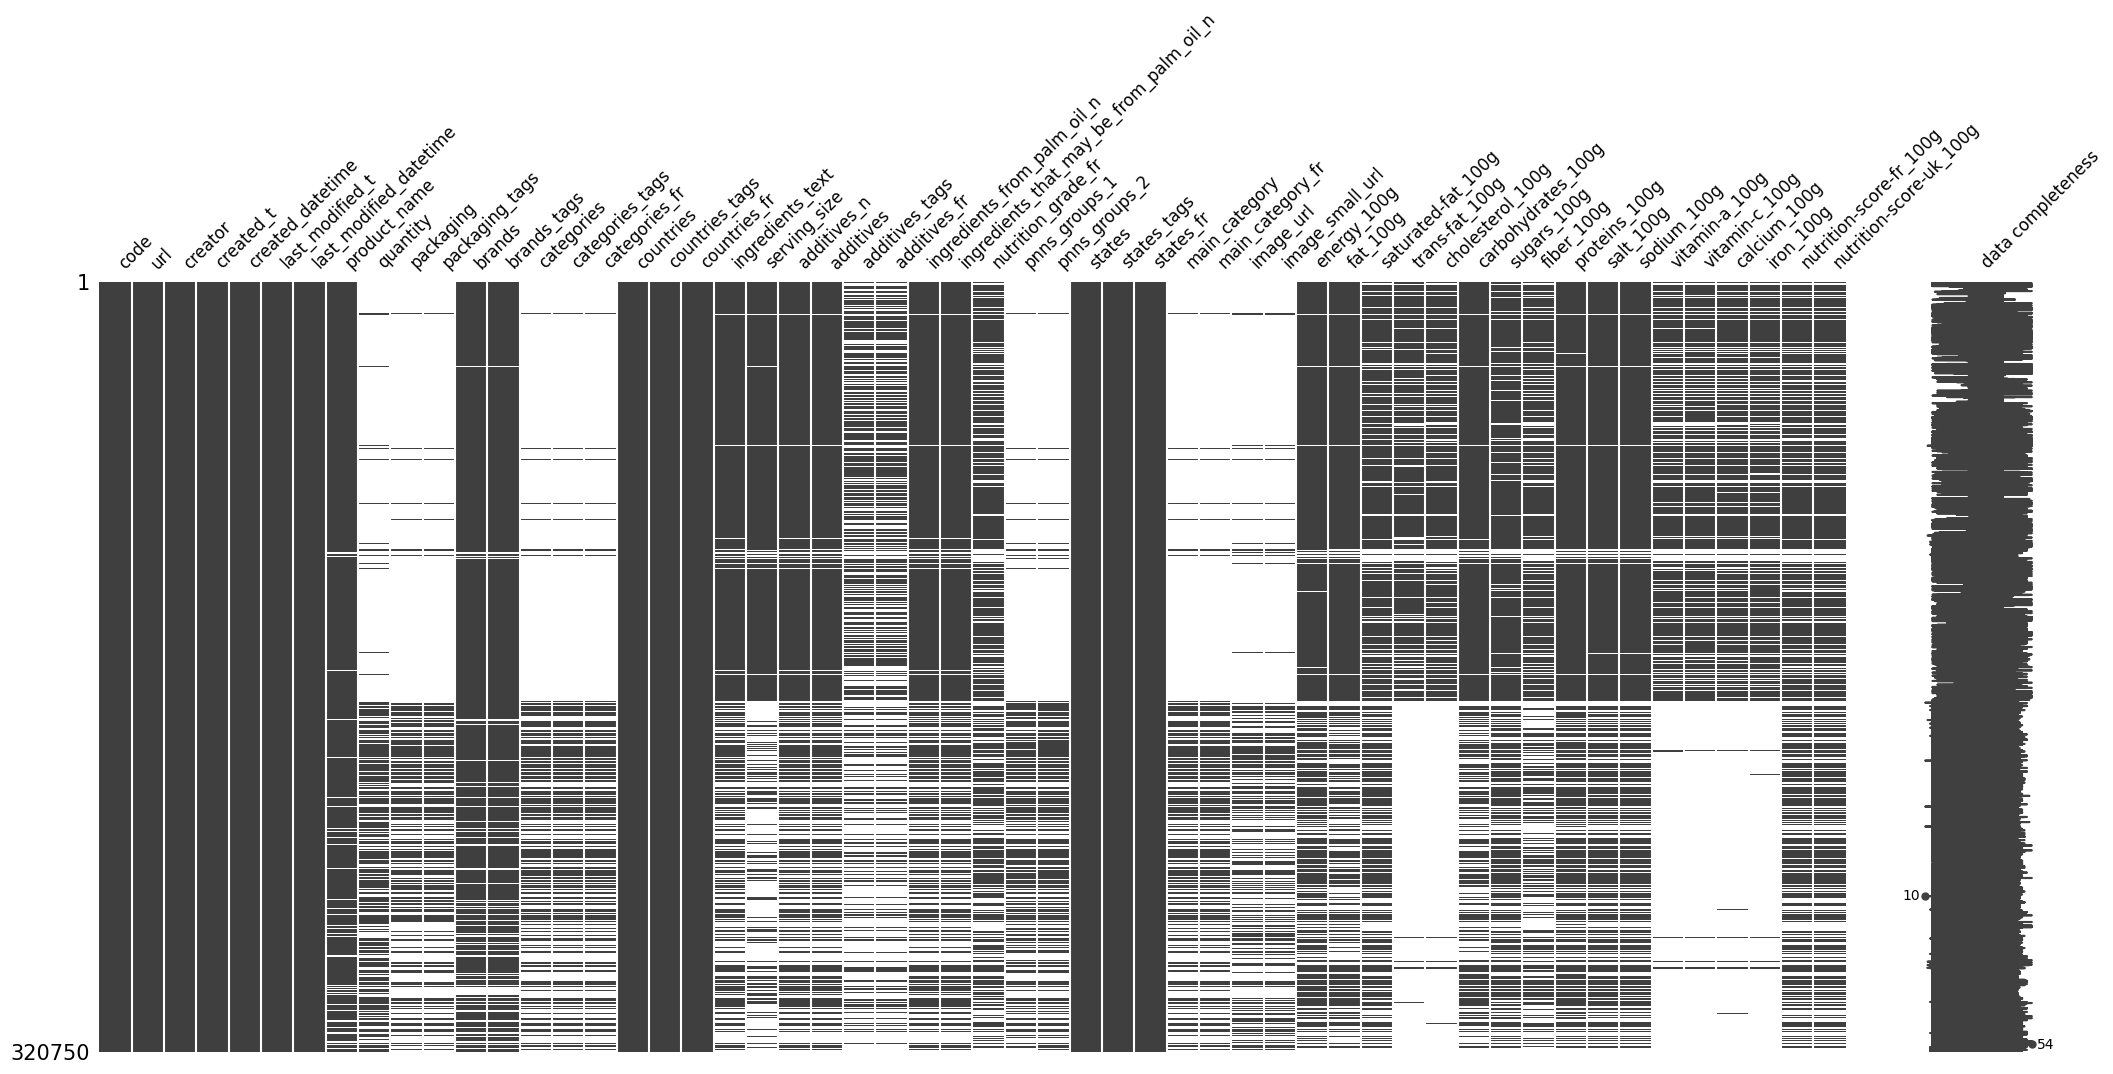

In [9]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.2*df.shape[0], axis=1)
# On retire les doublons pour la catégorie code et on garde le premier
df2_under_10 = df2_under_10.drop_duplicates(subset='code', keep='first')
# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [10]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

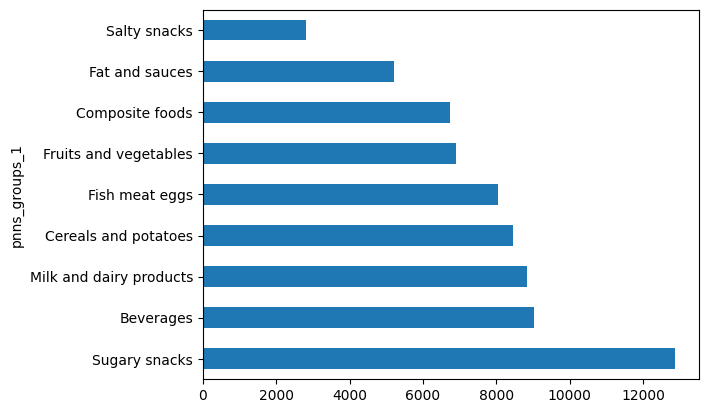

In [11]:
# Graphique
import matplotlib.pyplot as plt
df3_pnns['pnns_groups_1'].value_counts().plot(kind='barh')
plt.show()


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

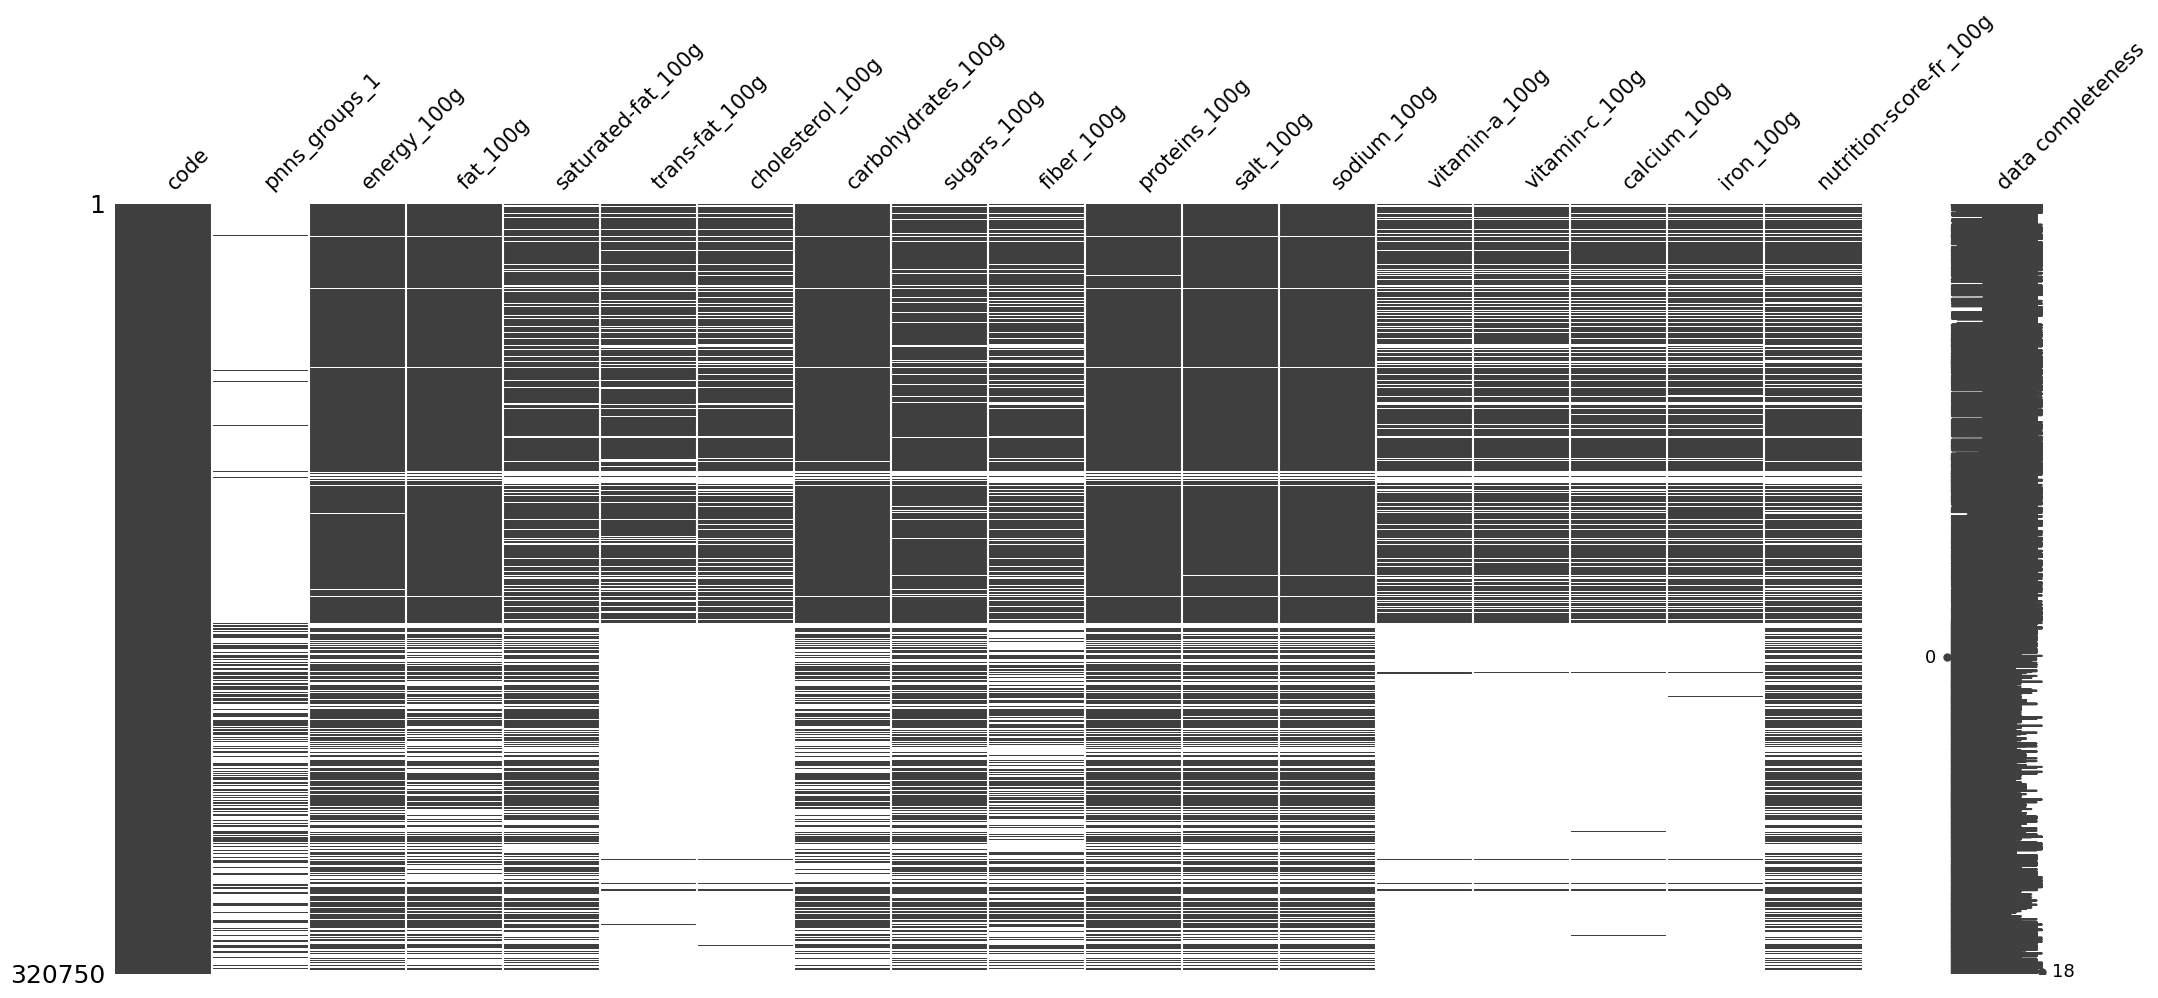

In [12]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

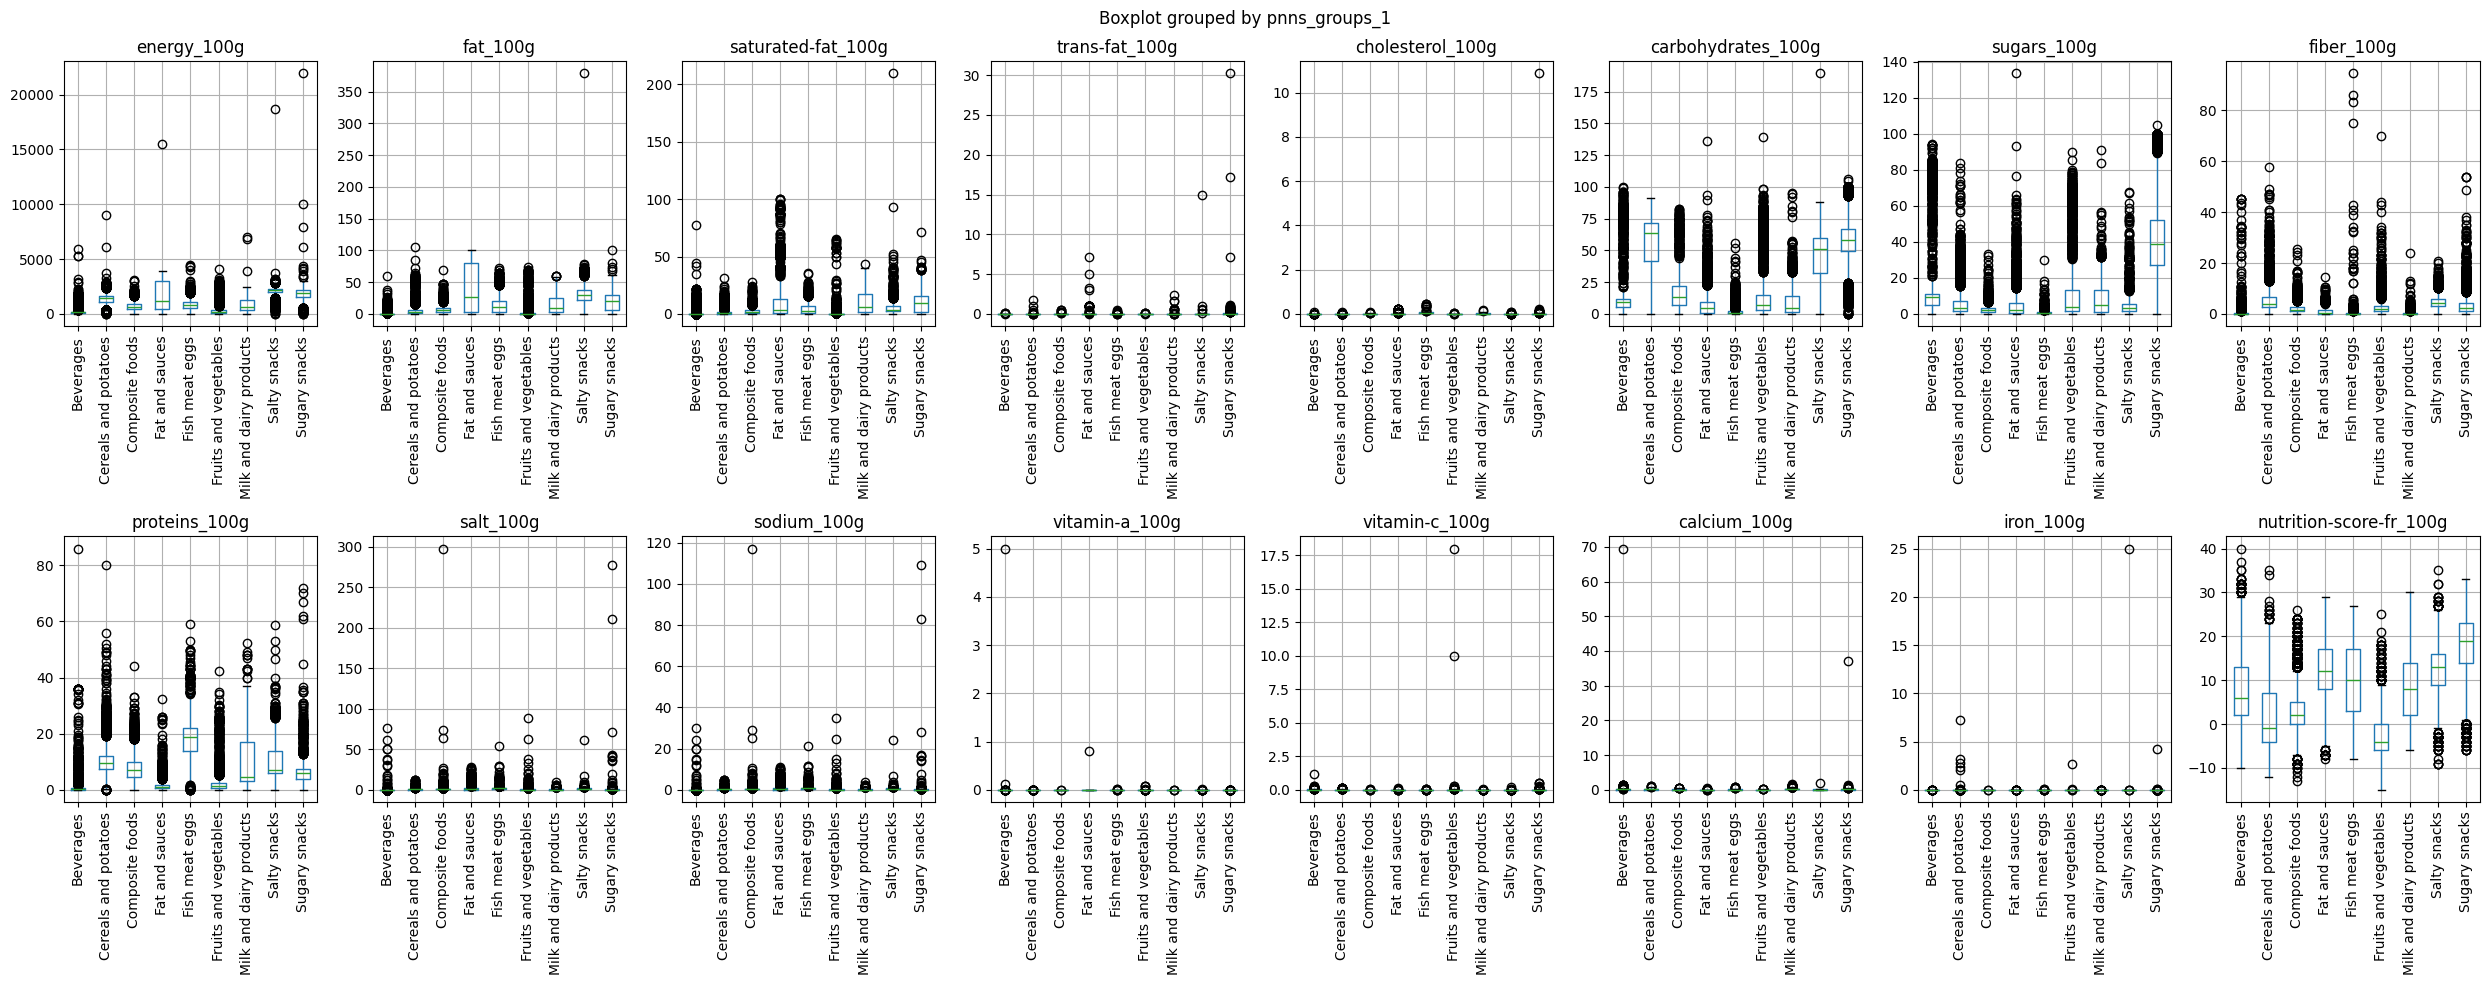

In [13]:
# Box plot pour chaque variable numérique et en fonction des catégories
import matplotlib.pyplot as plt

# Créations de variables pour afficher les boxplots en tableau et réduire l'espace occupé par les graphiques
num_cols = 8
num_rows = int(np.ceil(len(df4_drop.select_dtypes(include=['float64']).columns) / num_cols))


# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(df4_drop.select_dtypes(include=['float64']).columns):
    df4_drop.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

# Supprimer les axes inutilisés
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

# Afficher la figure
plt.tight_layout()
plt.show()

In [14]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan

# On affiche le nombre de valeurs remplacées par NaN
print(f"Nombre de valeurs remplacées par NaN : {df5_IQR.isna().sum().sum()}")


Nombre de valeurs remplacées par NaN : 2147209


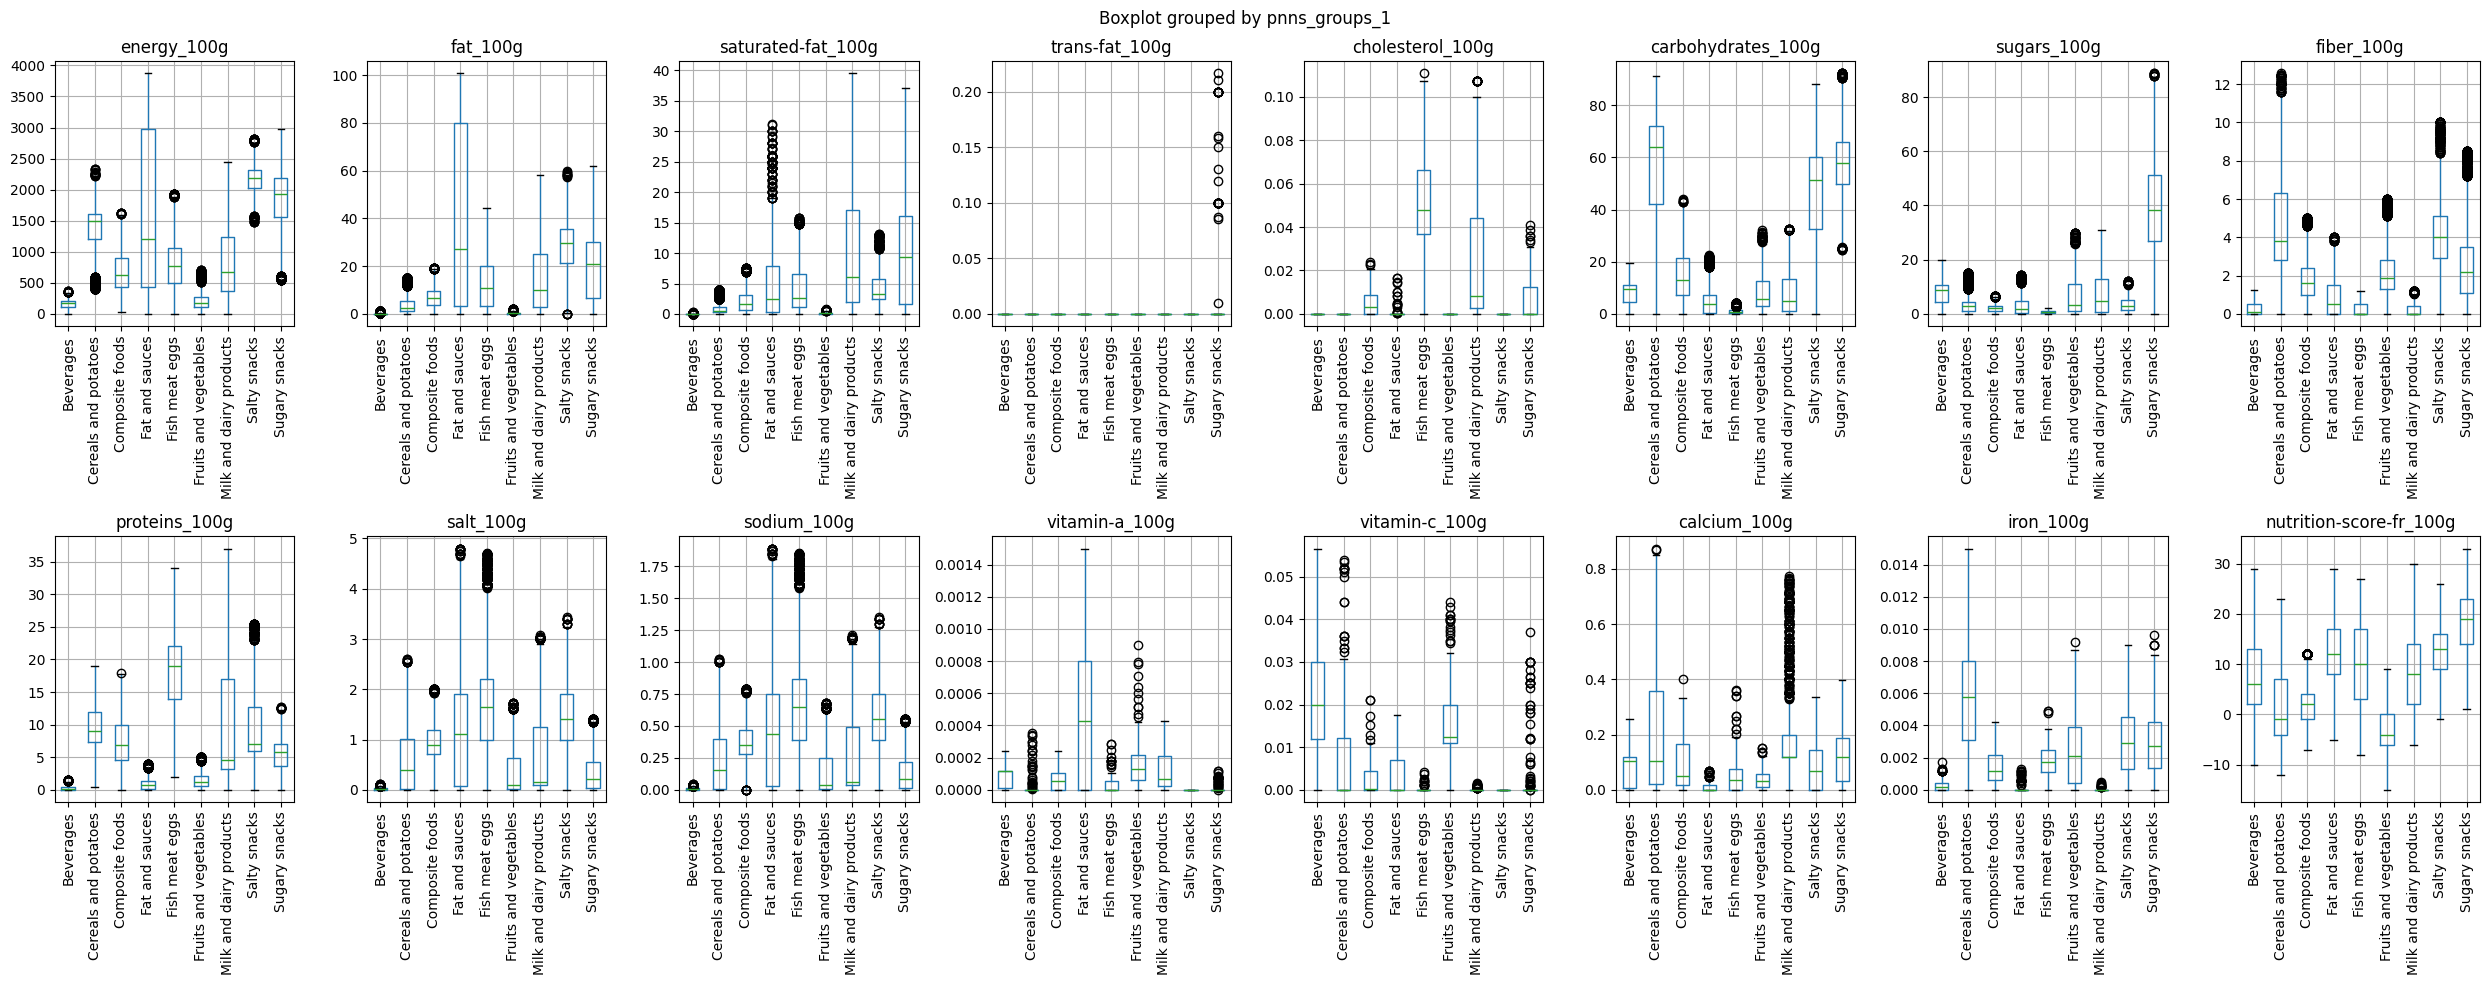

In [15]:
# On refait les boxplots avec df5_IQR
num_cols = 8
num_rows = int(np.ceil(len(df5_IQR.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df5_IQR.select_dtypes(include=['float64']).columns):
    df5_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

In [16]:
# On visualise la quantité d'inform

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

In [17]:
# On remplace les valeurs manquantes par la moyenne pour chaque catégorie de pnn_groups_1
df6_LR = df5_IQR.copy()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. On filtre les colonnes pertinentes
colonne_pertinente = ['pnns_groups_1'] + ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']
df7_filtré = df5_IQR[colonne_pertinente]
df7_filtré = df7_filtré.dropna(subset=['pnns_groups_1'])

# 2. Séparation des jeux de données en ensembles d'entraînement et de test
X = df7_filtré.drop(columns=['pnns_groups_1'])
y = df7_filtré['pnns_groups_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Imputation par la moyenne
imputer_mean = SimpleImputer(strategy="mean")
X_train_imputed = imputer_mean.fit_transform(X_train)
X_test_imputed = imputer_mean.transform(X_test)

# 4. One-hot encodage des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore') # Remove sparse=True
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# 5. Scale features (Important Change!)
scaler_mean = StandardScaler(with_mean=False)
X_train_scaled = scaler_mean.fit_transform(X_train_encoded.toarray()) # Convert to dense array
X_test_scaled = scaler_mean.transform(X_test_encoded.toarray()) 

# 6. Train and evaluate the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Rapport de classification:\n", classification_report(y_test, y_pred))


Accuracy: 0.63
Rapport de classification:
                          precision    recall  f1-score   support

              Beverages       0.41      0.91      0.57      2643
   Cereals and potatoes       0.71      0.65      0.68      2470
        Composite foods       0.61      0.54      0.57      2005
         Fat and sauces       0.68      0.54      0.60      1539
         Fish meat eggs       0.74      0.53      0.62      2473
  Fruits and vegetables       0.72      0.48      0.58      2115
Milk and dairy products       0.72      0.67      0.69      2677
           Salty snacks       0.55      0.47      0.51       835
          Sugary snacks       0.83      0.65      0.73      3910

               accuracy                           0.63     20667
              macro avg       0.66      0.61      0.62     20667
           weighted avg       0.68      0.63      0.63     20667



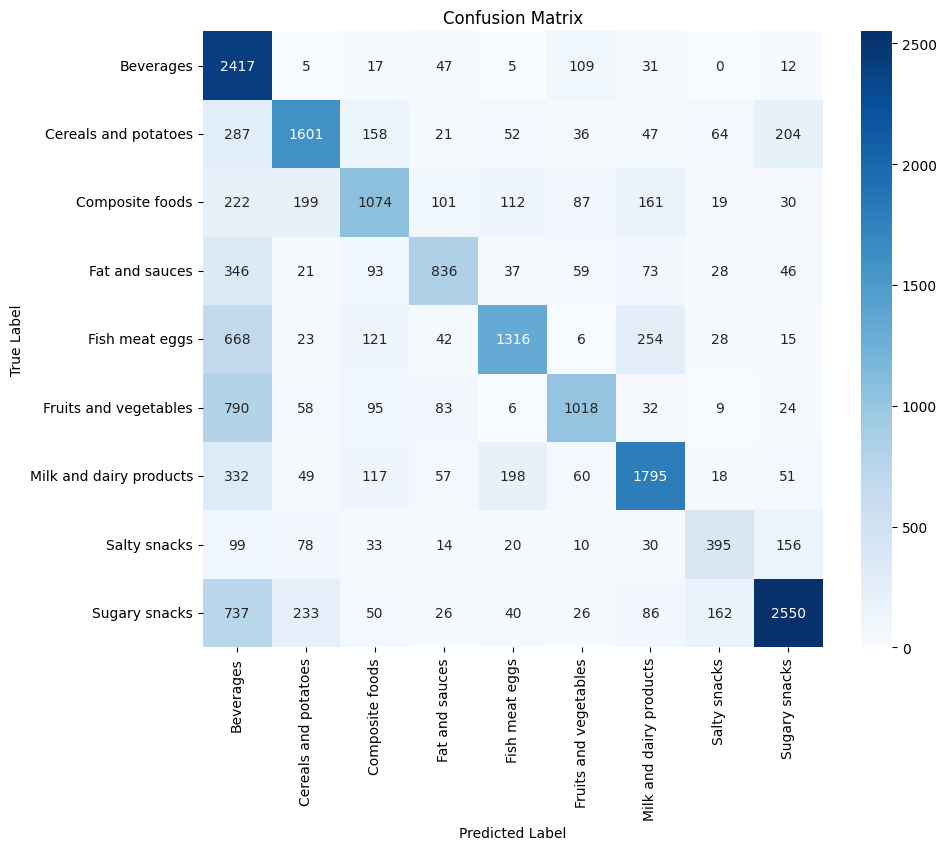

In [13]:
# Création d'une matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Création d'un DataFrame pour une meilleure visualisation
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# On affiche les coefficients de la régression logistique
# Extraire les coefficients et les noms des colonnes
coefficients = model.coef_[0]
column_names = encoder.get_feature_names_out(X.columns)

In [14]:
# Je vais tenter avec d'ajouter le nutrition score pour limiter les erreurs sur beverages même si la difficulté provient peut être du manque de valeurs 

# 1. On filtre les colonnes pertinentes
colonne_pertinente = ['pnns_groups_1'] + ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g']
df8_filtré = df5_IQR[colonne_pertinente]
df8_filtré = df8_filtré.dropna(subset=['pnns_groups_1'])

# 2. Séparation des jeux de données en ensembles d'entraînement et de test
X = df8_filtré.drop(columns=['pnns_groups_1'])
y = df8_filtré['pnns_groups_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Imputation par knn
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
X_train_imputed = imputer_knn.fit_transform(X_train)
X_test_imputed = imputer_knn.transform(X_test)

# 4. One-hot encodage des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore') # Remove sparse=True
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# 5. Scale features (Important Change!)
scaler_mean = StandardScaler(with_mean=False)
X_train_scaled = scaler_mean.fit_transform(X_train_encoded.toarray()) # Convert to dense array
X_test_scaled = scaler_mean.transform(X_test_encoded.toarray())

# 6. Train and evaluate the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Rapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.66
Rapport de classification:
                          precision    recall  f1-score   support

              Beverages       0.41      0.90      0.56      2643
   Cereals and potatoes       0.76      0.65      0.70      2470
        Composite foods       0.63      0.62      0.62      2005
         Fat and sauces       0.69      0.54      0.60      1539
         Fish meat eggs       0.78      0.57      0.66      2473
  Fruits and vegetables       0.75      0.48      0.59      2115
Milk and dairy products       0.75      0.71      0.73      2677
           Salty snacks       0.70      0.51      0.59       835
          Sugary snacks       0.85      0.70      0.77      3910

               accuracy                           0.66     20667
              macro avg       0.70      0.63      0.65     20667
           weighted avg       0.71      0.66      0.66     20667



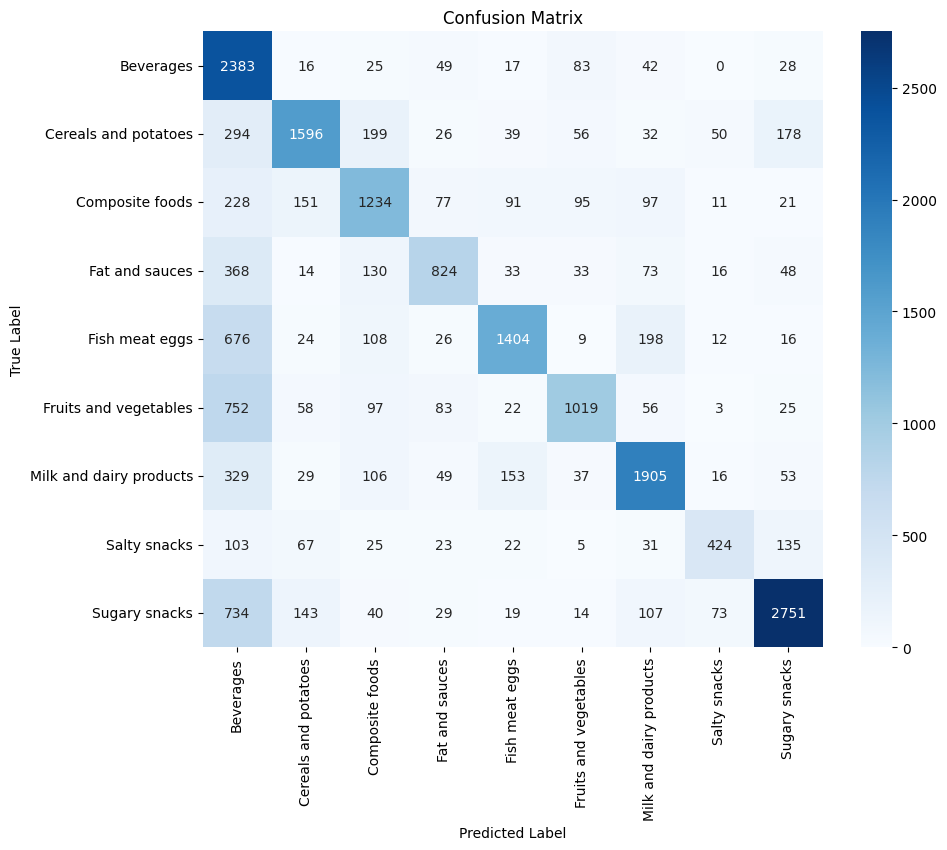

In [15]:
# Création d'une matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Création d'un DataFrame pour une meilleure visualisation
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# On affiche les coefficients de la régression logistique
# Extraire les coefficients et les noms des colonnes
coefficients = model.coef_[0]
column_names = encoder.get_feature_names_out(X.columns)